# Python Project - Prediction Model

## Data Wrangling

### Exploring the file '1_clinical_dataset.csv' which contains the target-variable RISK_MOLECULAR

In [32]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [33]:
csv_path1 = '1_clinical_dataset.csv'
df1 = pd.read_csv(csv_path1, error_bad_lines=False, sep = '\t', skiprows=4)
df1.head()

,PATIENT_ID,SEX,RACE,FAB,AGE,BM_BLAST_PERCENTAGE,WBC,PB_BLAST_PERCENTAGE,AML_IN_SKIN_PERCENTAGE,CYTOGENETICS,...,RISK_CYTO,HISTOLOGICAL_SUBTYPE,RISK_MOLECULAR,DFS_MONTHS,DFS_STATUS,INDUCTION,TRANSPLANT_TYPE,DARK_ZONE_STAT,OS_MONTHS,OS_STATUS
0,TCGA-AB-2803,Female,WHITE,M3,61,44,1.0,NaN,n.d.,"46,XX,t(15;17)(q22:q21)[15]",...,Good,PML-RARA,Good,24.1,1:Recurred/Progressed,7+3+ATRA,0,0,25.7,1:DECEASED
1,TCGA-AB-2804,Male,WHITE,M3,30,82,5.7,NaN,n.d.,"46, XY[25]",...,Intermediate,PML-RARA,Good,57.2,1:Recurred/Progressed,7+3+ATRA,"Auto, sib Allo","CR 2, CR 3",95.3,0:LIVING
2,TCGA-AB-2806,Male,WHITE,M1,46,90,29.4,81.0,n.d.,"45,X,-Y, t(8;7;21)(q22;p15;q22[22]/46,XY[3]",...,Good,RUNX1-RUNX1T1,Good,16.1,1:Recurred/Progressed,7+3+3+PSC,MUD,CR 2,30.6,1:DECEASED
3,TCGA-AB-2815,Male,WHITE,M4,49,81,57.1,48.0,n.d.,"46,XY,inv(16)(p13q22)[17]/46,XY[3]",...,Good,CBFB-MYH11,Good,14.2,1:Recurred/Progressed,7+3+3,MUD,Rel 2,26.3,1:DECEASED
4,TCGA-AB-2819,Female,WHITE,M2,52,67,4.1,18.0,n.d.,"46,XX,t(8;21)(q22;q22)[17]/46,XX[3]",...,Good,RUNX1-RUNX1T1,Good,95.6,0:DiseaseFree,7+3+3,0,0,95.6,0:LIVING


In [34]:
df1.describe()

,AGE,BM_BLAST_PERCENTAGE,WBC,PB_BLAST_PERCENTAGE,DFS_MONTHS,OS_MONTHS
count,200.000000,200.00000,200.00000,195.000000,200.000000,200.000000
mean,54.980000,69.33000,36.33600,37.917949,20.361500,25.966000
std,16.079251,19.04507,48.50857,31.843908,23.813753,25.922093
min,18.000000,30.00000,0.40000,0.000000,0.000000,0.000000
25%,44.000000,53.75000,3.10000,7.000000,4.750000,6.600000
50%,57.000000,73.00000,16.15000,35.000000,9.850000,16.700000
75%,67.000000,85.25000,48.12500,63.500000,27.875000,37.900000
max,88.000000,100.00000,298.40000,98.000000,100.500000,118.100000


In [35]:
df1 = df1.replace('N.D.', np.nan)

In [36]:
df_risk = df1[['PATIENT_ID', 'RISK_MOLECULAR']]
df_risk = df_risk.dropna()
df_risk.isna().sum()

PATIENT_ID        0
RISK_MOLECULAR    0
dtype: int64

In [37]:
df_risk

,PATIENT_ID,RISK_MOLECULAR
0,TCGA-AB-2803,Good
1,TCGA-AB-2804,Good
2,TCGA-AB-2806,Good
3,TCGA-AB-2815,Good
4,TCGA-AB-2819,Good
...,...,...
195,TCGA-AB-2945,Poor
196,TCGA-AB-2949,Poor
197,TCGA-AB-2952,Poor
198,TCGA-AB-2985,Poor


In [38]:
df_risk.dropna()

,PATIENT_ID,RISK_MOLECULAR
0,TCGA-AB-2803,Good
1,TCGA-AB-2804,Good
2,TCGA-AB-2806,Good
3,TCGA-AB-2815,Good
4,TCGA-AB-2819,Good
...,...,...
195,TCGA-AB-2945,Poor
196,TCGA-AB-2949,Poor
197,TCGA-AB-2952,Poor
198,TCGA-AB-2985,Poor


### Exploring the file '3_expression_dataset.csv' which contains the patients data

In [39]:
csv_path2 = '3_expression_dataset.csv'
df2 = pd.read_csv(csv_path2, error_bad_lines=False, sep = '\t')
df2 = df2.dropna()
df2.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-AB-2803-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2810-03,TCGA-AB-2811-03,TCGA-AB-2812-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
29,A1BG,1,412.4280,84.7724,187.1483,346.4449,131.7203,250.7719,168.0845,122.4699,...,213.3429,321.3714,235.4054,160.7187,94.9074,334.256,140.5642,114.7740,204.2100,294.4320
30,A1CF,29974,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.9042,0.0000,0.0000
31,A2BP1,54715,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
32,A2LD1,87769,71.4095,48.5475,50.8339,45.7498,47.1328,25.4511,38.1594,85.2901,...,31.5638,36.8571,20.7475,93.2959,42.4374,63.168,34.4324,107.5949,31.0281,30.8752
33,A2ML1,144568,2.0576,3.3467,5.7288,0.9930,5.4988,5.2667,0.5350,0.0000,...,29.4118,0.9524,0.0000,10.7642,3.8204,3.200,4.7587,29.8373,2.1645,1.8622


### Rearranging the dataframe in order to bring our data in the appropriate format for our prediction model

In [40]:
df_transposed = df2.T
df_transposed = df_transposed.reset_index()
df_transposed.head()

,index,29,30,31,32,33,34,35,36,37,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
0,Hugo_Symbol,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
1,Entrez_Gene_Id,1,29974,54715,87769,144568,2,53947,51146,404744,...,7789,158586,79364,440590,79699,7791,23140,26009,387590,389932
2,TCGA-AB-2803-03,412.4280,0.0,0.0,71.4095,2.0576,467.0782,11.3169,0.0000,0.0,...,32.9218,451.6461,3404.3210,15.4321,1108.0247,4480.4527,2488.6831,1199.5885,16.4609,0.0000
3,TCGA-AB-2805-03,84.7724,0.0,0.0,48.5475,3.3467,16.0643,0.6693,2.6774,0.0,...,12.0482,356.0910,4020.0803,2.6774,1774.4311,5780.4552,3826.6399,1145.9170,12.0482,5.3548
4,TCGA-AB-2806-03,187.1483,0.0,0.0,50.8339,5.7288,7.0019,17.8230,1.2731,0.0,...,67.4729,825.5888,3817.3138,1.9096,749.2043,5467.8549,3679.8218,1944.6213,97.3902,0.0000


In [41]:
df_f = df_transposed.drop([1])
df_f.head()

,index,29,30,31,32,33,34,35,36,37,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
0,Hugo_Symbol,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
2,TCGA-AB-2803-03,412.4280,0.0,0.0,71.4095,2.0576,467.0782,11.3169,0.0000,0.0,...,32.9218,451.6461,3404.3210,15.4321,1108.0247,4480.4527,2488.6831,1199.5885,16.4609,0.0000
3,TCGA-AB-2805-03,84.7724,0.0,0.0,48.5475,3.3467,16.0643,0.6693,2.6774,0.0,...,12.0482,356.0910,4020.0803,2.6774,1774.4311,5780.4552,3826.6399,1145.9170,12.0482,5.3548
4,TCGA-AB-2806-03,187.1483,0.0,0.0,50.8339,5.7288,7.0019,17.8230,1.2731,0.0,...,67.4729,825.5888,3817.3138,1.9096,749.2043,5467.8549,3679.8218,1944.6213,97.3902,0.0000
5,TCGA-AB-2807-03,346.4449,0.0,0.0,45.7498,0.9930,343.5948,116.1867,4.9652,0.0,...,151.9364,910.6256,2579.9404,4.9652,1206.5541,3543.1976,4209.5333,1394.2403,17.8749,6.9513


In [42]:
new_header = df_f.iloc[0] #grab the first row for the header
df_f = df_f[1:] #take the data less the header row
df_f.columns = new_header #set the header row as the df header
df_f.rename(columns={"Hugo_Symbol": "PATIENT_ID"}, inplace=True)
df_f.head()

,PATIENT_ID,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
2,TCGA-AB-2803-03,412.4280,0.0,0.0,71.4095,2.0576,467.0782,11.3169,0.0000,0.0,...,32.9218,451.6461,3404.3210,15.4321,1108.0247,4480.4527,2488.6831,1199.5885,16.4609,0.0000
3,TCGA-AB-2805-03,84.7724,0.0,0.0,48.5475,3.3467,16.0643,0.6693,2.6774,0.0,...,12.0482,356.0910,4020.0803,2.6774,1774.4311,5780.4552,3826.6399,1145.9170,12.0482,5.3548
4,TCGA-AB-2806-03,187.1483,0.0,0.0,50.8339,5.7288,7.0019,17.8230,1.2731,0.0,...,67.4729,825.5888,3817.3138,1.9096,749.2043,5467.8549,3679.8218,1944.6213,97.3902,0.0000
5,TCGA-AB-2807-03,346.4449,0.0,0.0,45.7498,0.9930,343.5948,116.1867,4.9652,0.0,...,151.9364,910.6256,2579.9404,4.9652,1206.5541,3543.1976,4209.5333,1394.2403,17.8749,6.9513
6,TCGA-AB-2808-03,131.7203,0.0,0.0,47.1328,5.4988,255.9152,182.2467,0.7855,0.0,...,40.0628,506.6771,3084.8390,1.5711,1582.0896,3626.8657,2891.5947,1432.0503,21.9953,0.0000


In [43]:
df_f['PATIENT_ID'] = df_f['PATIENT_ID'].str[:-3]
df_f.loc[:, (df_f != 0).any(axis=0)]
df_f.head()

,PATIENT_ID,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
2,TCGA-AB-2803,412.4280,0.0,0.0,71.4095,2.0576,467.0782,11.3169,0.0000,0.0,...,32.9218,451.6461,3404.3210,15.4321,1108.0247,4480.4527,2488.6831,1199.5885,16.4609,0.0000
3,TCGA-AB-2805,84.7724,0.0,0.0,48.5475,3.3467,16.0643,0.6693,2.6774,0.0,...,12.0482,356.0910,4020.0803,2.6774,1774.4311,5780.4552,3826.6399,1145.9170,12.0482,5.3548
4,TCGA-AB-2806,187.1483,0.0,0.0,50.8339,5.7288,7.0019,17.8230,1.2731,0.0,...,67.4729,825.5888,3817.3138,1.9096,749.2043,5467.8549,3679.8218,1944.6213,97.3902,0.0000
5,TCGA-AB-2807,346.4449,0.0,0.0,45.7498,0.9930,343.5948,116.1867,4.9652,0.0,...,151.9364,910.6256,2579.9404,4.9652,1206.5541,3543.1976,4209.5333,1394.2403,17.8749,6.9513
6,TCGA-AB-2808,131.7203,0.0,0.0,47.1328,5.4988,255.9152,182.2467,0.7855,0.0,...,40.0628,506.6771,3084.8390,1.5711,1582.0896,3626.8657,2891.5947,1432.0503,21.9953,0.0000


### Merging both dataframes & dropping NaN data

In [44]:
Xm = pd.merge(df_f, df_risk, on="PATIENT_ID")
Xm = Xm.dropna()
Xm.head()

,PATIENT_ID,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,RISK_MOLECULAR
0,TCGA-AB-2803,412.4280,0.0,0.0,71.4095,2.0576,467.0782,11.3169,0.0000,0.0,...,451.6461,3404.3210,15.4321,1108.0247,4480.4527,2488.6831,1199.5885,16.4609,0.0000,Good
1,TCGA-AB-2805,84.7724,0.0,0.0,48.5475,3.3467,16.0643,0.6693,2.6774,0.0,...,356.0910,4020.0803,2.6774,1774.4311,5780.4552,3826.6399,1145.9170,12.0482,5.3548,Intermediate
2,TCGA-AB-2806,187.1483,0.0,0.0,50.8339,5.7288,7.0019,17.8230,1.2731,0.0,...,825.5888,3817.3138,1.9096,749.2043,5467.8549,3679.8218,1944.6213,97.3902,0.0000,Good
3,TCGA-AB-2807,346.4449,0.0,0.0,45.7498,0.9930,343.5948,116.1867,4.9652,0.0,...,910.6256,2579.9404,4.9652,1206.5541,3543.1976,4209.5333,1394.2403,17.8749,6.9513,Intermediate
4,TCGA-AB-2808,131.7203,0.0,0.0,47.1328,5.4988,255.9152,182.2467,0.7855,0.0,...,506.6771,3084.8390,1.5711,1582.0896,3626.8657,2891.5947,1432.0503,21.9953,0.0000,Intermediate


In [45]:
X = Xm.iloc[:, Xm.columns != 'RISK_MOLECULAR']  #independent columns
X = X.iloc[:, X.columns != 'PATIENT_ID']  #independent columns
y = Xm['RISK_MOLECULAR']    #target column i.e price range
X.var()

A1BG         1.143151e+04
A1CF         1.008875e-02
A2BP1        5.987592e+00
A2LD1        1.016495e+03
A2ML1        2.176106e+02
                 ...     
ZYX          2.349708e+07
ZZEF1        9.861180e+05
ZZZ3         1.532420e+05
psiTPTE22    3.184646e+04
tAKR         6.004158e+03
Length: 20502, dtype: float64

In [46]:
y

0              Good
1      Intermediate
2              Good
3      Intermediate
4      Intermediate
           ...     
165            Good
166    Intermediate
167    Intermediate
168    Intermediate
169            Good
Name: RISK_MOLECULAR, Length: 170, dtype: object

In [47]:
print(X.dtypes)

A1BG         object
A1CF         object
A2BP1        object
A2LD1        object
A2ML1        object
              ...  
ZYX          object
ZZEF1        object
ZZZ3         object
psiTPTE22    object
tAKR         object
Length: 20502, dtype: object


In [48]:
X = X.infer_objects()
X.dtypes

A1BG         float64
A1CF         float64
A2BP1        float64
A2LD1        float64
A2ML1        float64
              ...   
ZYX          float64
ZZEF1        float64
ZZZ3         float64
psiTPTE22    float64
tAKR         float64
Length: 20502, dtype: object

## Feature Selection using computing chi-squared stats

In [49]:
from sklearn.feature_selection import SelectFpr, chi2, SelectKBest, SelectFwe, f_classif, SelectFdr
    
selector = SelectKBest(score_func=chi2, k=10)
new_data = selector.fit_transform(X, y)
mask = selector.get_support()
new_features = X.columns[mask]
new_features

Index(['AZU1', 'CALR', 'CST7', 'ELANE', 'HGF', 'LYZ', 'MALAT1', 'MPO', 'STAB1',
       'VCAN'],
      dtype='object')

### Plotting the features selected using Pearson Correlation

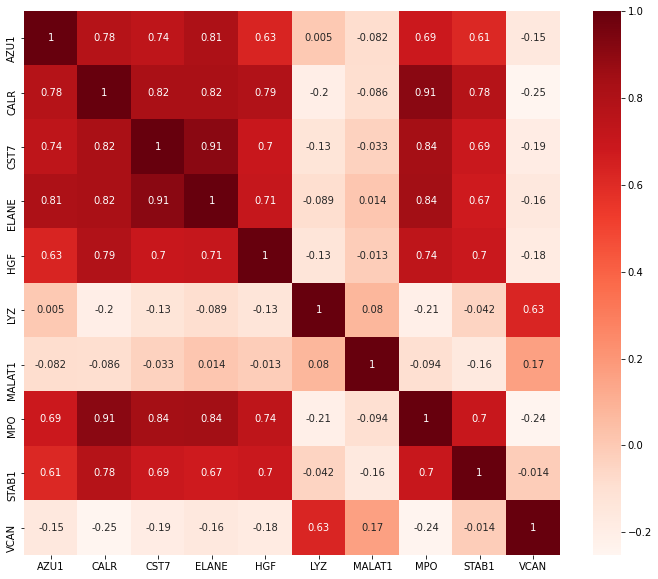

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

X = X[new_features]

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Splitting the dataset in Train & Test sets

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
print(X_train)  
print(y_train)

           AZU1        CALR        CST7       ELANE         HGF          LYZ  \
5    37640.9845  55389.5131   2214.0182   4409.8448     10.7009  104967.8973   
106   9327.5261  16798.4901    452.9617    116.1440    178.8618  422916.3763   
137  10208.6486  34592.4324   3432.4324   3904.8649    592.4324   13102.7027   
48    2413.4036  10650.6024    666.4157    615.9639     24.8494    9227.4096   
76    1525.2101  15483.1933   2627.7311   1171.4286   1902.5210   53384.0336   
..          ...         ...         ...         ...         ...          ...   
37   12763.7571  21809.3220   2995.0565   9967.5141   2451.9774  114457.6271   
56    3266.6667  23815.1899  15801.6878   4208.4388   1702.1097   17480.1688   
31   26191.5984  60273.5656  10608.6066  22711.0656  10092.2131   17806.3525   
72     402.8514  11630.0494    481.0821    408.7004   1048.4372    4440.8700   
19    3298.4836  10240.2235    192.3384    177.9729    181.9633  210490.8220   

          MALAT1          MPO       STA

# Prediction Model

## Testing different classifiers in order to see which model has the highest Accuracy

In [52]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 58.8235%
Log Loss: 4.5942363041458245
SVC
****Results****
Accuracy: 50.0000%
Log Loss: 0.7289457099175883
NuSVC
****Results****
Accuracy: 64.7059%
Log Loss: 0.897678068920307
DecisionTreeClassifier
****Results****
Accuracy: 73.5294%
Log Loss: 9.14261728100577
RandomForestClassifier
****Results****
Accuracy: 70.5882%
Log Loss: 0.5764937529166587
AdaBoostClassifier
****Results****
Accuracy: 67.6471%
Log Loss: 0.7218792416008039
GradientBoostingClassifier
****Results****
Accuracy: 67.6471%
Log Loss: 0.7253025755297636
GaussianNB
****Results****
Accuracy: 52.9412%
Log Loss: 3.319873969565999
LinearDiscriminantAnalysis
****Results****
Accuracy: 70.5882%
Log Loss: 0.7069305847523587
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 52.9412%
Log Loss: 3.2686134875679222


## Plotting the Results 

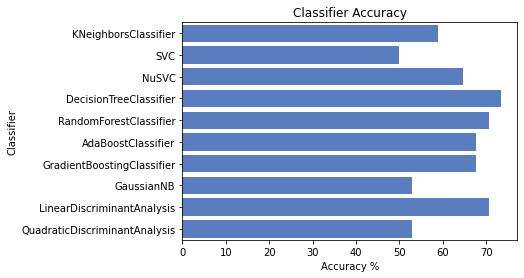

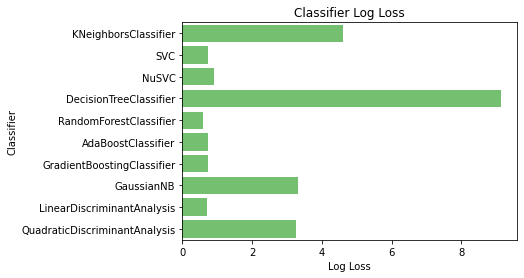

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

### Based on Accuracy and Log loss the top three classifiers are: 
* Random Forest
* Linear Discriminant
* Ada Boosting 

Decision Tree Classifier although it has a high accuracy percentage, also has high Log loss and therefore is not listed in the top three classifiers.